## Project Overview 

My company, "Visit with Us" seeks to expand its customer base by employing a more data-driven business model. 

Visit with Us is planning to launch a new product called the "Wellness Tourism Package" which allows the traveler to maintain, enhance or kick-start a healthy lifestyle - and support or increase their sense of well-being.

Unlike last year's campaign, our company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

#### The objective is to build a model to predict the customers most likely to purchase the "Wellness Tourism" travel package.

This notebook is a summary of my customer data analysis, model building, and insights - which serves as the basis for my recommendations to senior management. 

## Notebook Contents


### Notebook Contents
- <a href= "#link1">1.Data Loading and Initial Review </a>
- <a href= "#link2">2.Exploratory Data Analysis (EDA): Univariate Analysis </a>
- <a href= "#link3">3.Exploratory Data Analysis (EDA): Multivariate Analysis </a>
- <a href= "#link4">4.Data Pre-Processing (for Modeling) </a>
- <a href= "#link5">5.Modeling: Bagging </a>
- <a href= "#link6">6.Modeling: Boosting </a>
- <a href= "#link7">7.Final Insights and Recommendations </a>

## <a id = "link1">Data Loading and Initial Review</a>

#### Load Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install xgboost 

In [8]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org xgboost

In [9]:
from xgboost import XGBClassifier

#### Load Customer Data File

In [11]:
customer_data = pd.read_csv("Tourism.csv")

#### Initial Data Review

In [13]:
customer_data.info()

# many columns are of the type "object" i.e. strings. They need to be converted to ordinal type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [14]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [15]:
# looking at which columns have the most missing values
customer_data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [16]:
dupes = customer_data.duplicated()
sum(dupes)

0

**Observations -**
* There are 25 or more null values in eight columns in the the dataset. The highest (duration of the salesperson pitch) is 251, which is about 5% of the total observations.
* We will impute the missing values with median values for numerical data. 
* There are several other numerical columns with missing values that really should be categorical (e.g., PreferredPropertyStar). We will impute the median for those too before converting their data type.  
* There is one column of categorical data with 25 missing values. Since we cannot impute a median or a numeric value, we will drop it (< 1% of obs).  
* We will also convert the object type columns to categories (converting "objects" to "category" reduces the data space required to store the dataframe)

In [18]:
# Replace NaN values with the median of the column
customer_data['DurationOfPitch'].fillna(customer_data.DurationOfPitch.median(), inplace = True)  

In [19]:
# Replace NaN values with the median of the column
customer_data['MonthlyIncome'].fillna(customer_data.MonthlyIncome.median(), inplace = True)  

In [20]:
# Replace NaN values with the median of the column
customer_data['Age'].fillna(customer_data.Age.median(), inplace = True)  

In [21]:
# Replace NaN values with the median of the column
customer_data['NumberOfTrips'].fillna(customer_data.NumberOfTrips.median(), inplace = True)  

In [22]:
# Replace NaN values with the median of the column
customer_data['NumberOfChildrenVisiting'].fillna(customer_data.NumberOfChildrenVisiting.median(), inplace = True)  

In [23]:
# Replace NaN values with the median of the column
customer_data['NumberOfFollowups'].fillna(customer_data.NumberOfFollowups.median(), inplace = True)  

In [24]:
# Replace NaN values with the median of the column
customer_data['PreferredPropertyStar'].fillna(customer_data.PreferredPropertyStar.median(), inplace = True)  

In [25]:
customer_data['TypeofContact'].dropna(axis=0, how='any', inplace=True)

In [26]:
customer_data.info() # did the TypeofContact NAs get dropped? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [27]:
cols = customer_data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [28]:
for i in cols.columns:
    customer_data[i] = customer_data[i].astype('category')

In [29]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [30]:
customer_data["CityTier"] = customer_data["CityTier"].astype("category")
customer_data["NumberOfPersonVisiting"] = customer_data["NumberOfPersonVisiting"].astype("category")
customer_data["NumberOfFollowups"] = customer_data["NumberOfFollowups"].astype("category")
customer_data["PreferredPropertyStar"] = customer_data["PreferredPropertyStar"].astype("category")
customer_data["Passport"] = customer_data["Passport"].astype("category")
customer_data["PitchSatisfactionScore"] = customer_data["PitchSatisfactionScore"].astype("category")
customer_data["OwnCar"] = customer_data["OwnCar"].astype("category")
customer_data["NumberOfChildrenVisiting"] = customer_data["NumberOfChildrenVisiting"].astype("category")

customer_data["ProdTaken"] = customer_data["ProdTaken"].astype("category")


In [31]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4888.0,23559.179419,5257.862921,1000.0,20485.00,22347.0,25424.75,98678.0


In [32]:
customer_data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
NumberOfFollowups,4888.0,6.0,4.0,2113.0
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340


#### Drop the columns that won't add value to our modeling

In [34]:
customer_data.drop(['CustomerID'],axis=1,inplace=True)

#### Let's look at the unique values of all the categories

In [36]:
cols_cat= customer_data.select_dtypes(['category'])

In [37]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
ProdTaken
0    3968
1     920
Name: count, dtype: int64
**************************************************
Unique values in TypeofContact are :
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
**************************************************
Unique values in CityTier are :
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
**************************************************
Unique values in Occupation are :
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
**************************************************
Unique values in NumberOfPersonVisiting are :
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64
***************

There are 155 people whose gender is "Fe male" instead of "Female." We will correct this. 

In [39]:
# correct "Fe male" errors
customer_data["Gender"].replace({"Fe Male": "Female"}, inplace=True)

In [40]:
customer_data.groupby(['Gender'])[['Gender']].count()

,Gender
Gender,
Female,1972
Male,2916


In [41]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

## <a id = "link2"> Exploratory Data Analysis (EDA): Univariate Analysis</a>

In [43]:
# While doing uni-variate analysis of NUMERICAL VARIABLES we want to study their central tendency and dispersion.
# This function will help us create boxplot and histogram for any input NUMERICAL VARIABLE. 
# This function takes the NUMERICAL COLUMN as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [44]:
# Function to create barplots that indicate percentage for each CATEGORY.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

In [45]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,customer_data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,customer_data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Numeric / Quantitative Variables

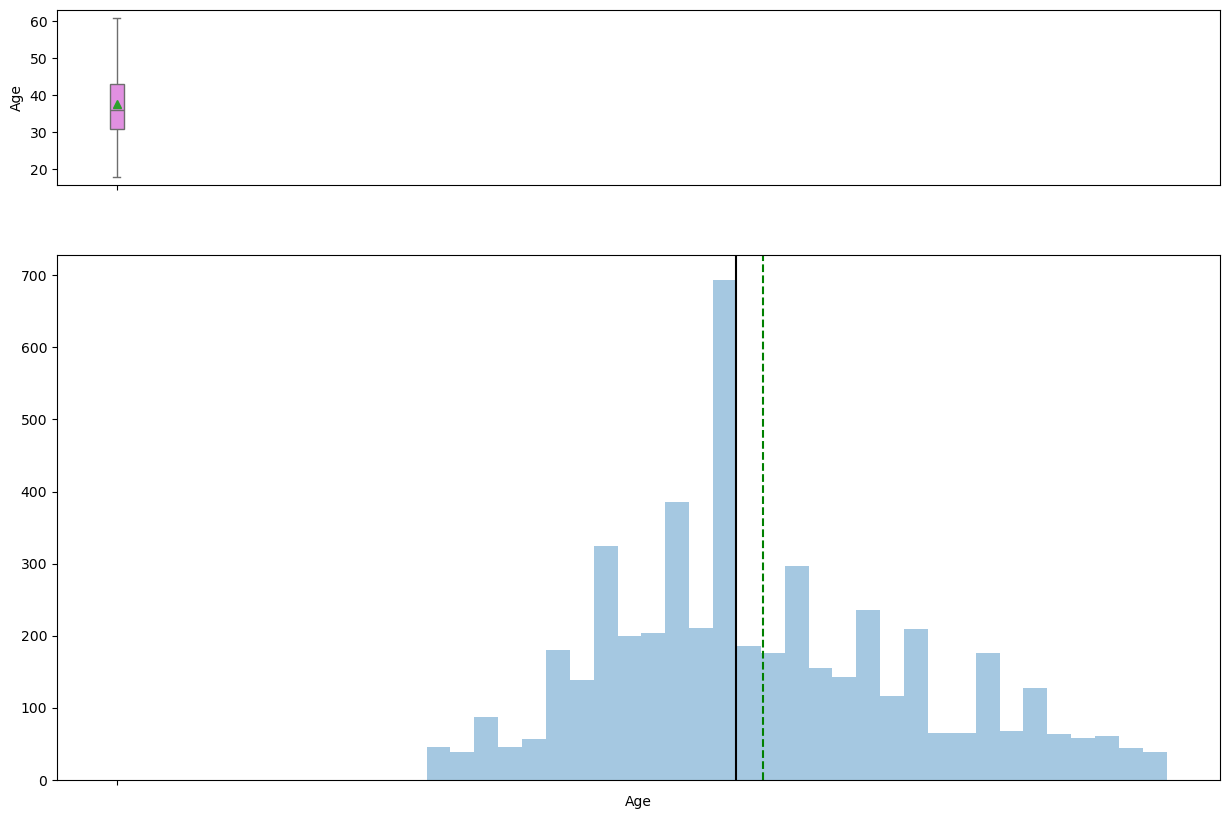

In [47]:
histogram_boxplot(customer_data['Age'])

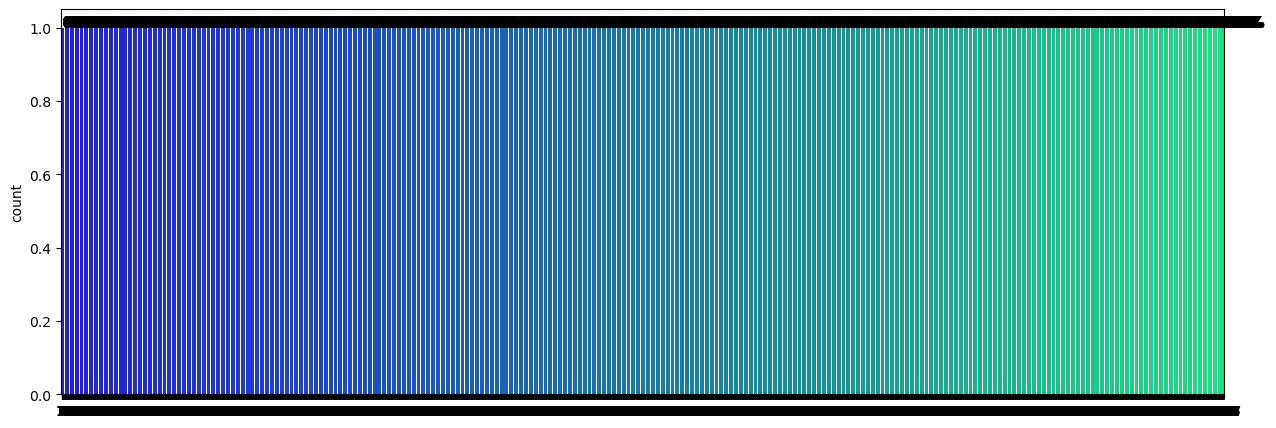

In [48]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["Age"],palette='winter')
perc_on_bar(ax,customer_data["Age"])

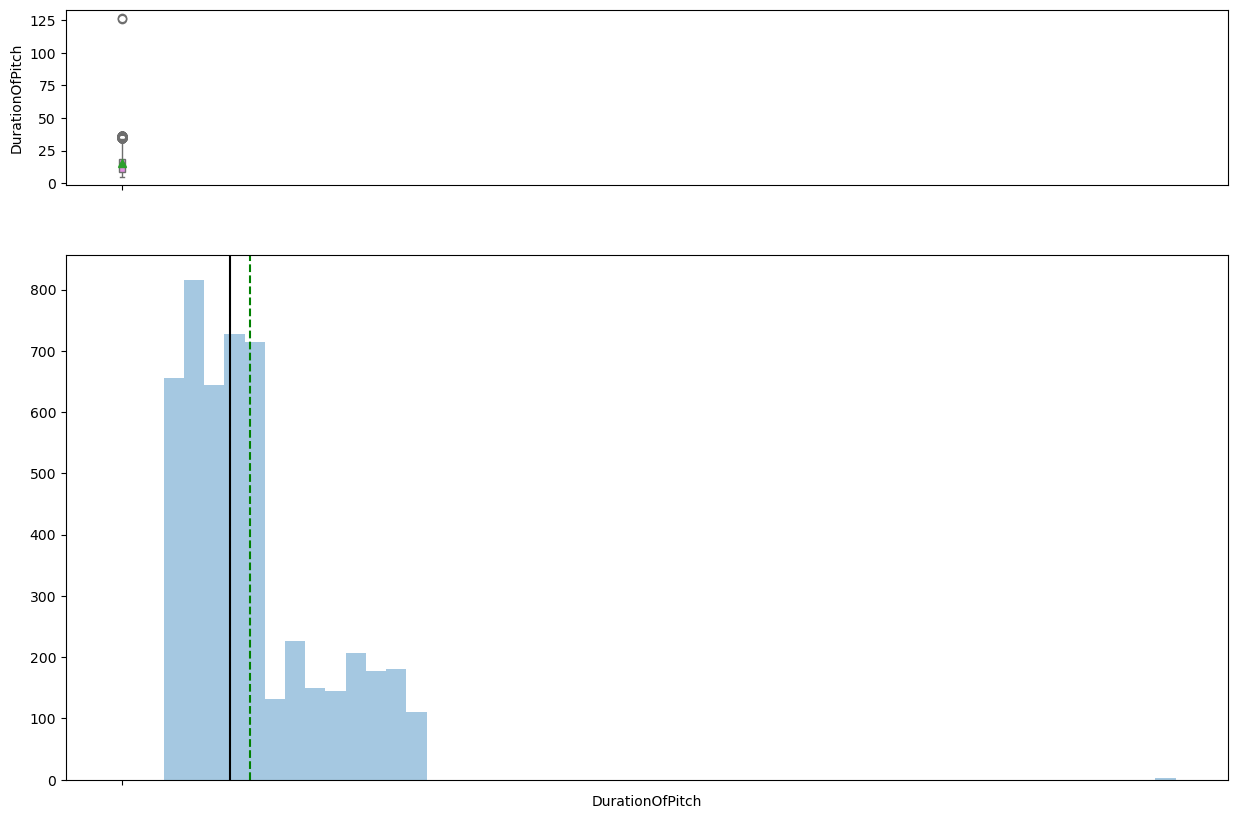

In [49]:
histogram_boxplot(customer_data['DurationOfPitch'])

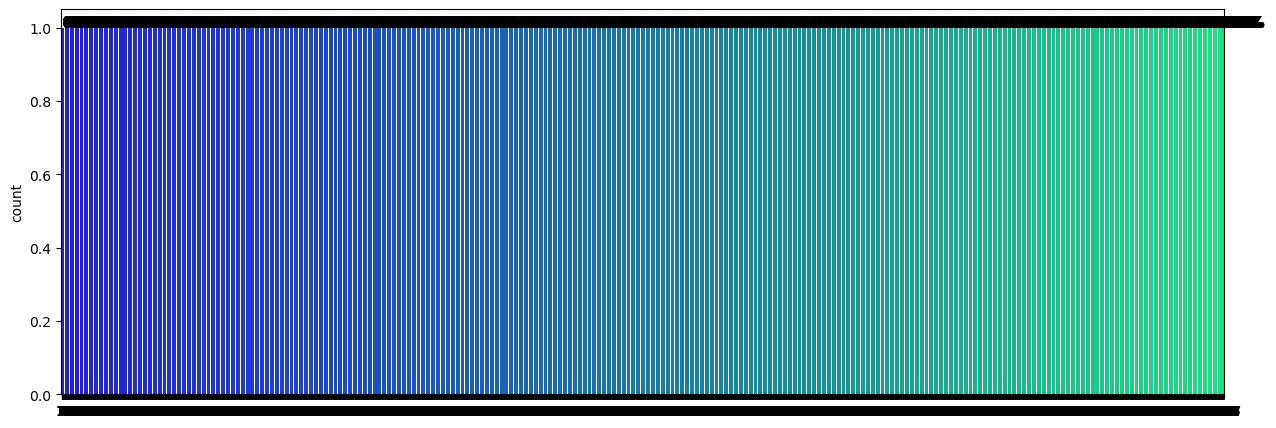

In [50]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["DurationOfPitch"],palette='winter')
perc_on_bar(ax,customer_data["DurationOfPitch"])

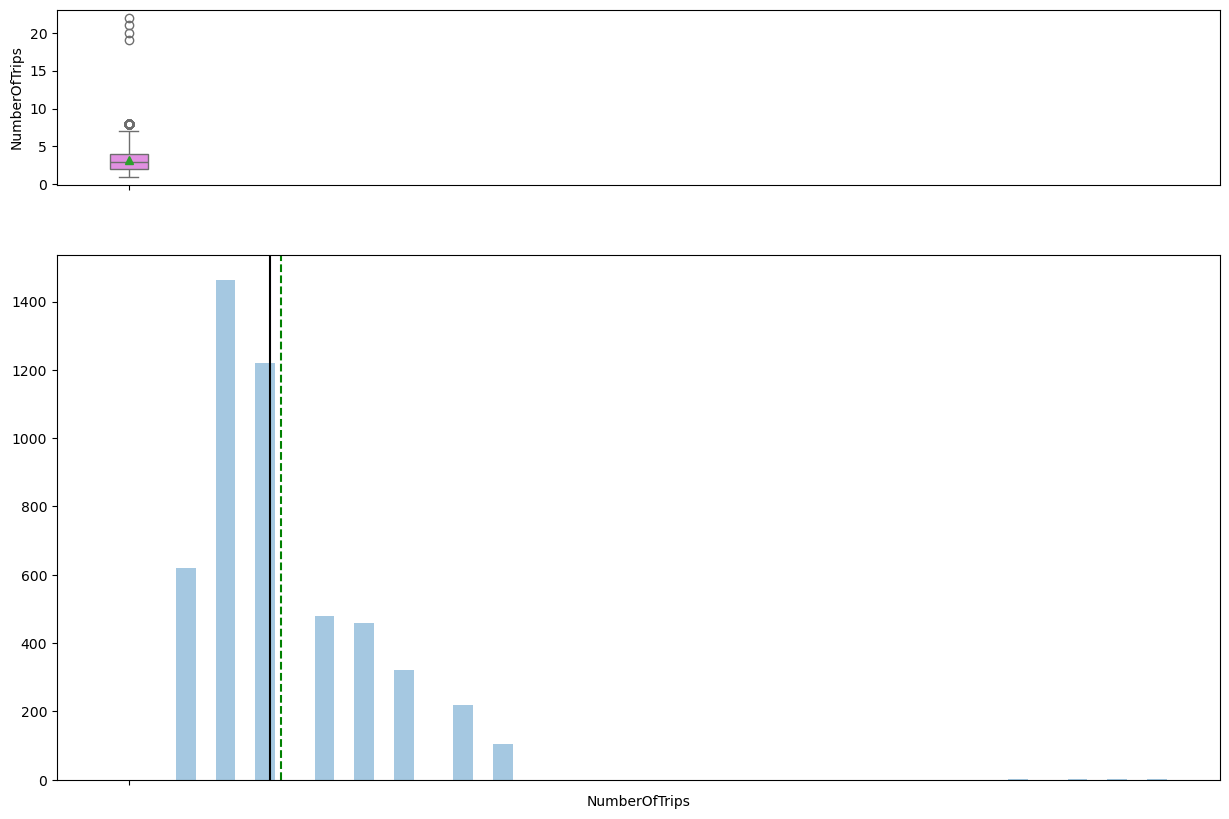

In [51]:
histogram_boxplot(customer_data['NumberOfTrips'])

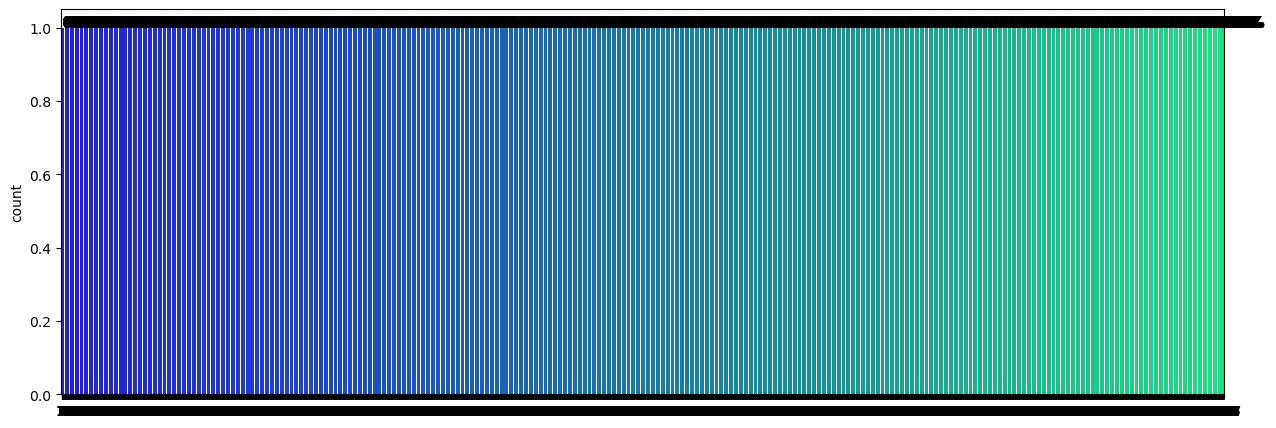

In [52]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["NumberOfTrips"],palette='winter')
perc_on_bar(ax,customer_data["NumberOfTrips"])

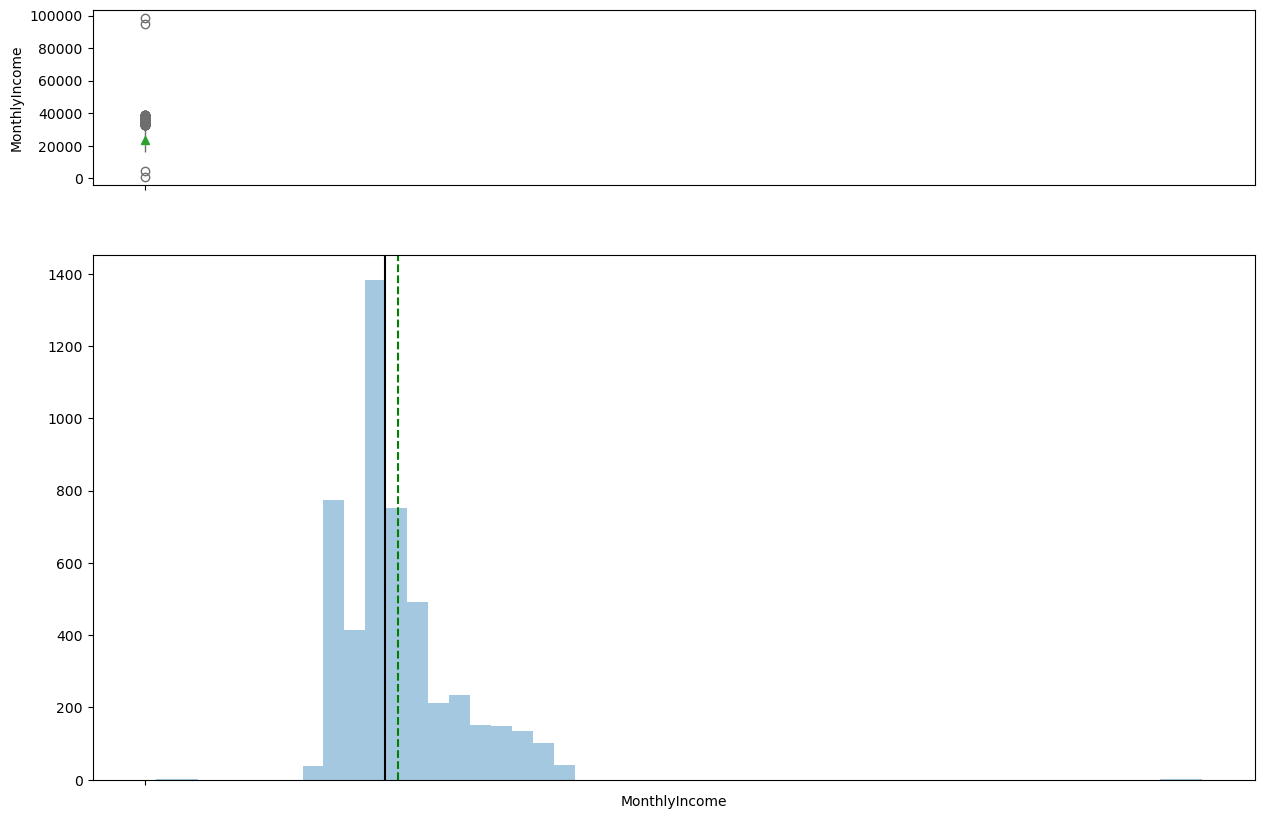

In [53]:
histogram_boxplot(customer_data['MonthlyIncome'])

In [54]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23559.179419,5257.862921,1000.0,20485.0,22347.0,25424.75,98678.0


#### Age (of the customer, in years)
There are 4.7% missing values which were be imputed with the median age.
The median age (prior to imputing) is 36 years old, which is slightly less than the average of 37.6. The youngest person in the sample is 18, and the oldest is 61. 
After imputing, the descriptive statistics were nearly identical - which is the case for other variables with missing values.

#### Duration of Pitch (duration of the pitch by a salesperson to the customer, in minutes)
There are 5.2% missing values which were be imputed with the median pitch duration. 
The median pitch (prior to imputing) duration is 13 minutes, which is slightly less than average of 15.5 minutes. The shortest pitch is only five minutes and the longest is considerably long – at 127 minutes. 

#### Number of Trips (the average number of trips in a year by the customer)
There are 2.9% missing values which were be imputed with the median number of trips. 
The median number of trips per year, by customer, is 3, which is slightly less than the average of 3.2. While 75% of customer sampled take four or fewer trips, on average, there are four individuals who average 19 to 22 trips per year. All four of them are either an Executive or Manager with an average monthly income of 22,891, which equates to 274,695 per year. 

#### Monthly Income (gross monthly income of the customer)
There are 4.8% missing values which were be imputed with the median monthly income. 
The median monthly income (prior to imputing) is 22,347, (268,164 annually) which is less than the average of 23,620 (283,440) – indicating that the average customer has a gross income well above national averages. There are customers who make as little as 1,000 per month (12,000 annually), but 25% or more make at least 20,346 per month (244,152 annually). 

There are two divorced female customers who are executives with a gross monthly income of 95,000 (1,140,000 annually) and 98,678 (1,184,136 annually). 
While those observations appear as outliers, it is entirely plausible for executives to make more than $1.1 million annually.


### Categorical / Qualitative Variables

In [57]:
customer_data.groupby(['ProdTaken'])[['ProdTaken']].count()

,ProdTaken
ProdTaken,
0,3968
1,920


In [58]:
n_true = len(customer_data.loc[customer_data['ProdTaken'] == 1])
n_false = len(customer_data.loc[customer_data['ProdTaken'] == 0])
print("Number of customers who have purchased a travel package in the past: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who have not purchased a travel package in the past: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who have purchased a travel package in the past: 920 (18.82%)
Number of customers who have not purchased a travel package in the past: 3968 (81.18%)


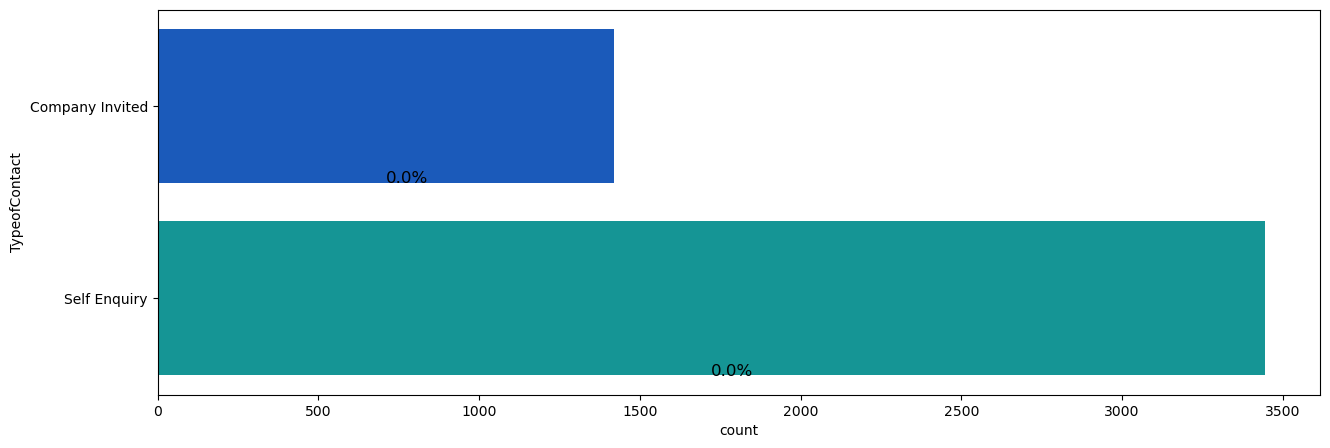

In [59]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["TypeofContact"],palette='winter')
perc_on_bar(ax,customer_data["TypeofContact"])

In [60]:
customer_data.groupby(['TypeofContact'])[['TypeofContact']].count()

,TypeofContact
TypeofContact,
Company Invited,1419
Self Enquiry,3444


In [61]:
n_true = len(customer_data.loc[customer_data['TypeofContact'] == 'Company Invited'])
n_false = len(customer_data.loc[customer_data['TypeofContact'] == 'Self Enquiry'])
print("Number of customers who were contacted by our company: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who self-inquired about a travel package: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who were contacted by our company: 1419 (29.18%)
Number of customers who self-inquired about a travel package: 3444 (70.82%)


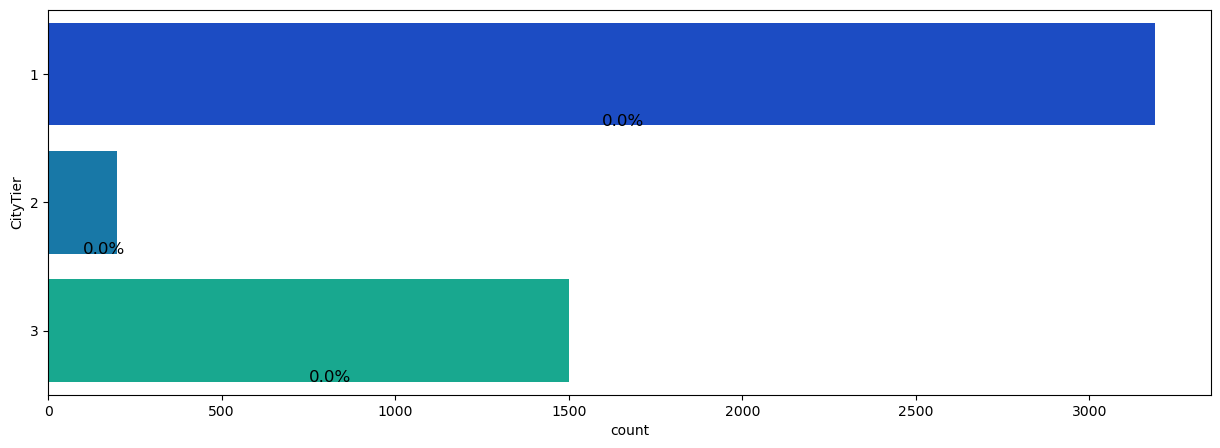

In [62]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["CityTier"],palette='winter')
perc_on_bar(ax,customer_data["CityTier"])

In [63]:
customer_data.groupby(['CityTier'])[['CityTier']].count()

,CityTier
CityTier,
1,3190
2,198
3,1500


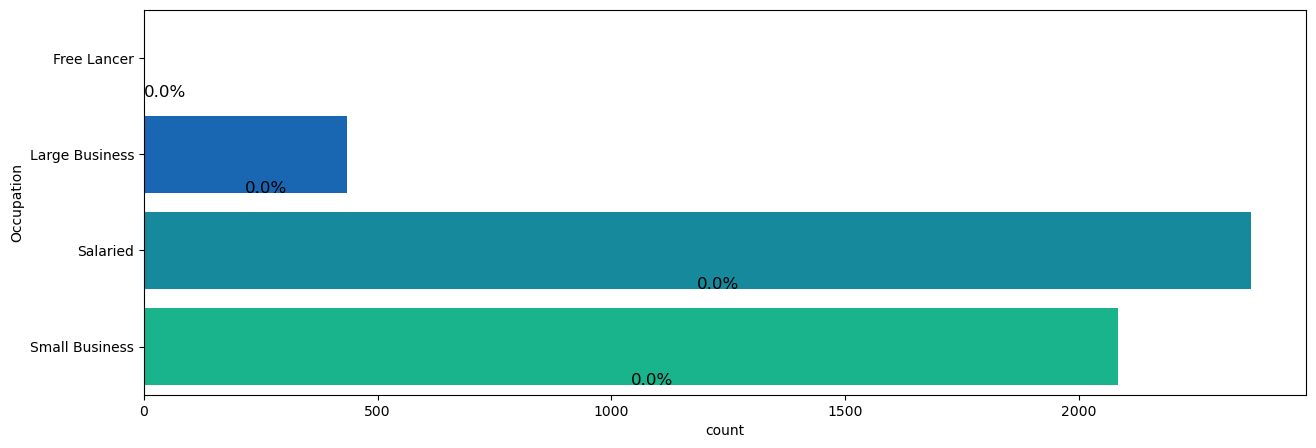

In [64]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["Occupation"],palette='winter')
perc_on_bar(ax,customer_data["TypeofContact"])

In [65]:
customer_data.groupby(['Occupation'])[['Occupation']].count()

,Occupation
Occupation,
Free Lancer,2
Large Business,434
Salaried,2368
Small Business,2084


In [66]:
customer_data.groupby(['Gender'])[['Gender']].count()

,Gender
Gender,
Female,1972
Male,2916


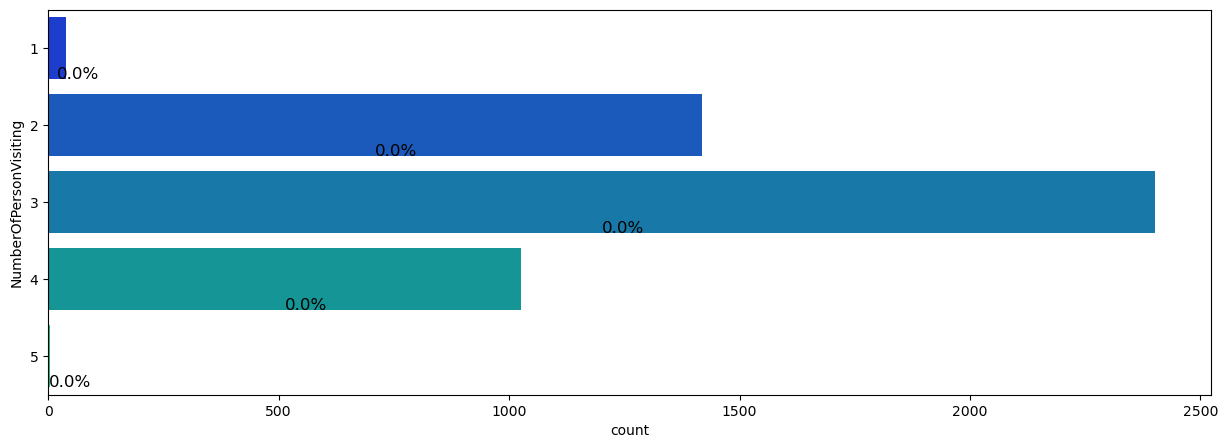

In [67]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["NumberOfPersonVisiting"],palette='winter')
perc_on_bar(ax,customer_data["NumberOfPersonVisiting"])

In [68]:
customer_data.groupby(['NumberOfPersonVisiting'])[['NumberOfPersonVisiting']].count()

,NumberOfPersonVisiting
NumberOfPersonVisiting,
1,39
2,1418
3,2402
4,1026
5,3


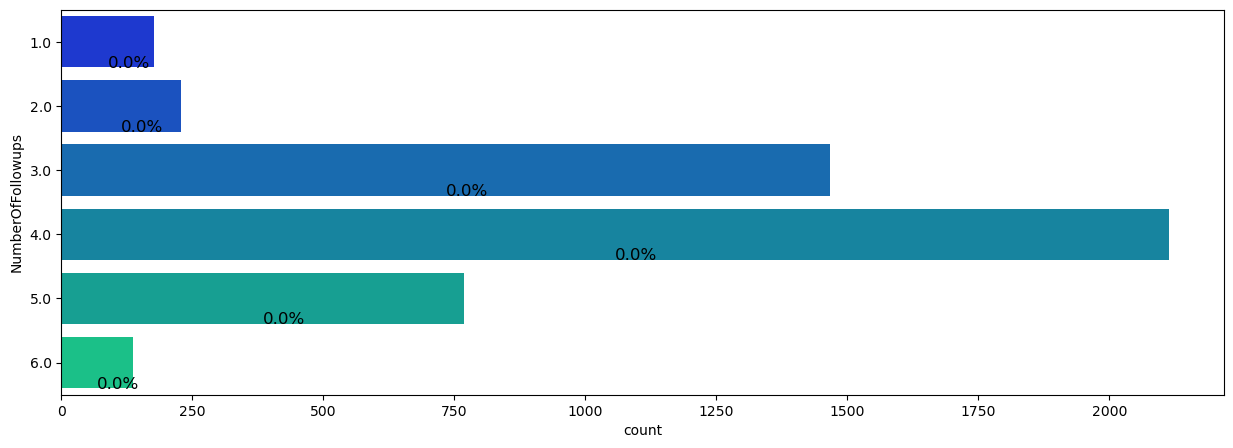

In [69]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,customer_data["NumberOfFollowups"])

In [70]:
customer_data.groupby(['NumberOfFollowups'])[['NumberOfFollowups']].count()

,NumberOfFollowups
NumberOfFollowups,
1.0,176
2.0,229
3.0,1466
4.0,2113
5.0,768
6.0,136


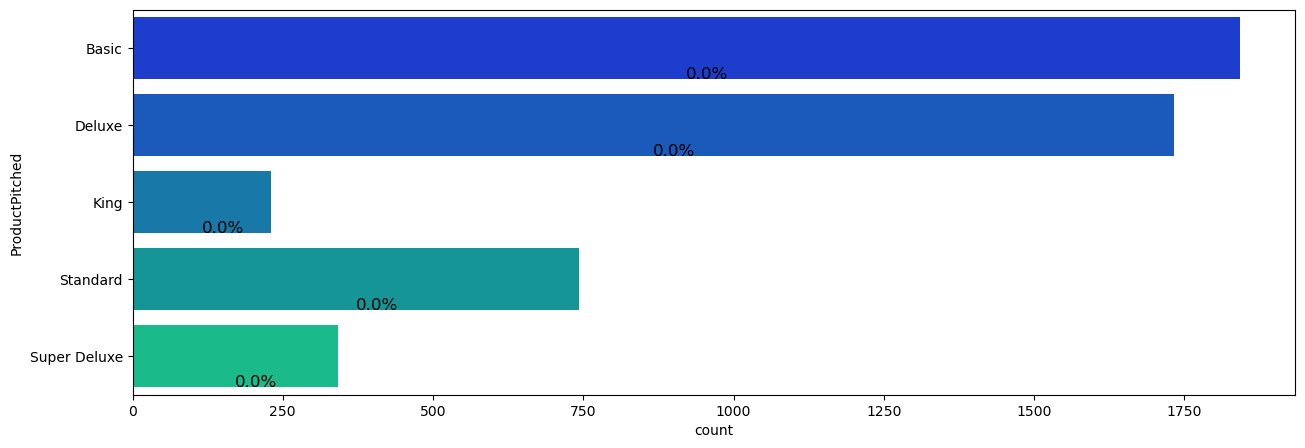

In [71]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["ProductPitched"],palette='winter')
perc_on_bar(ax,customer_data["ProductPitched"])

In [72]:
customer_data.groupby(['ProductPitched'])[['ProductPitched']].count()

,ProductPitched
ProductPitched,
Basic,1842
Deluxe,1732
King,230
Standard,742
Super Deluxe,342


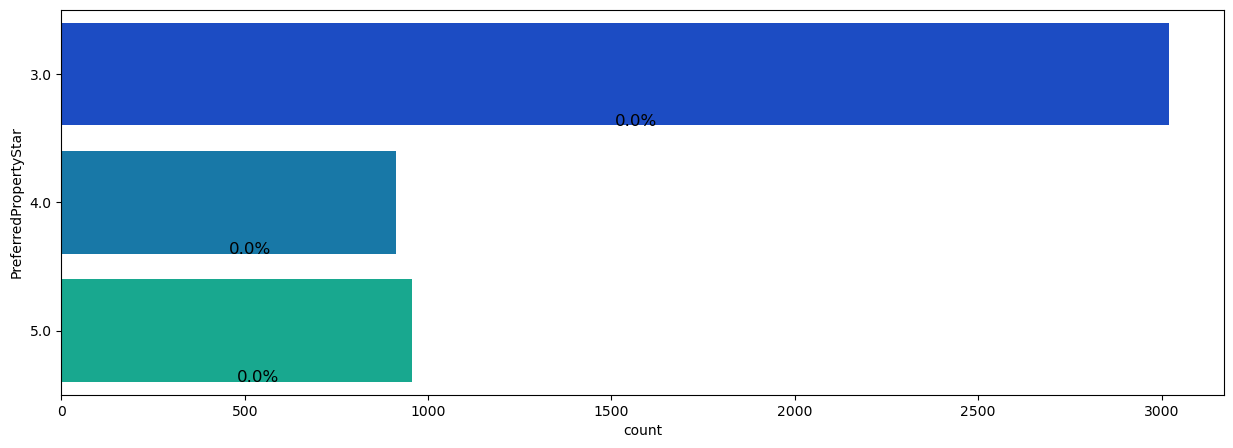

In [73]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,customer_data["PreferredPropertyStar"])

In [74]:
customer_data.groupby(['PreferredPropertyStar'])[['PreferredPropertyStar']].count()

,PreferredPropertyStar
PreferredPropertyStar,
3.0,3019
4.0,913
5.0,956


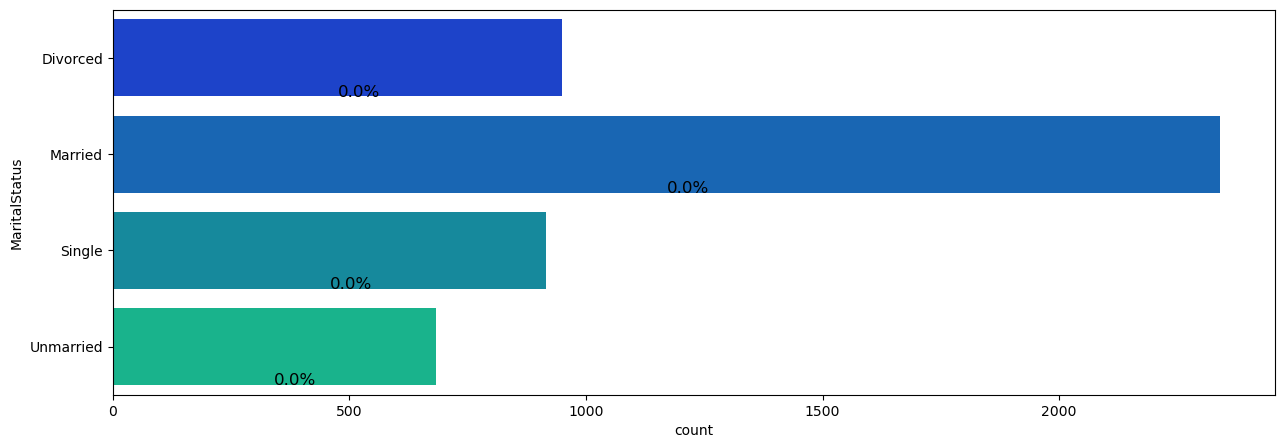

In [75]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["MaritalStatus"],palette='winter')
perc_on_bar(ax,customer_data["MaritalStatus"])

In [76]:
customer_data.groupby(['MaritalStatus'])[['MaritalStatus']].count()

,MaritalStatus
MaritalStatus,
Divorced,950
Married,2340
Single,916
Unmarried,682


In [77]:
customer_data.groupby(['Passport'])[['Passport']].count()

,Passport
Passport,
0,3466
1,1422


In [78]:
n_true = len(customer_data.loc[customer_data['Passport'] == 1])
n_false = len(customer_data.loc[customer_data['Passport'] == 0])
print("Number of customers who have a passport: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who do not have a passport: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who have a passport: 1422 (29.09%)
Number of customers who do not have a passport: 3466 (70.91%)


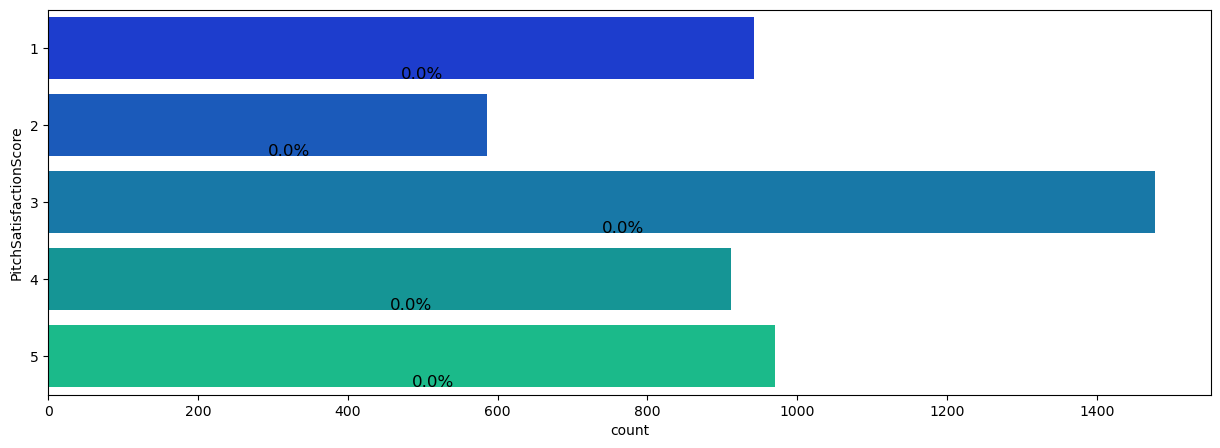

In [79]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["PitchSatisfactionScore"],palette='winter')
perc_on_bar(ax,customer_data["PitchSatisfactionScore"])

In [80]:
customer_data.groupby(['PitchSatisfactionScore'])[['PitchSatisfactionScore']].count()

,PitchSatisfactionScore
PitchSatisfactionScore,
1,942
2,586
3,1478
4,912
5,970


In [81]:
customer_data.groupby(['OwnCar'])[['OwnCar']].count()

,OwnCar
OwnCar,
0,1856
1,3032


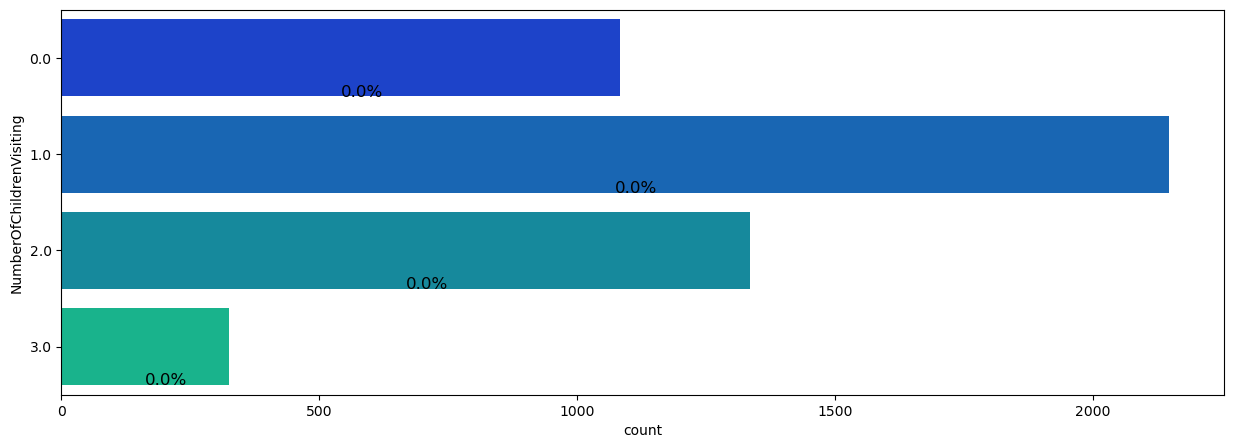

In [82]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["NumberOfChildrenVisiting"],palette='winter')
perc_on_bar(ax,customer_data["NumberOfChildrenVisiting"])

In [83]:
customer_data.groupby(['NumberOfChildrenVisiting'])[['NumberOfChildrenVisiting']].count()

,NumberOfChildrenVisiting
NumberOfChildrenVisiting,
0.0,1082
1.0,2146
2.0,1335
3.0,325


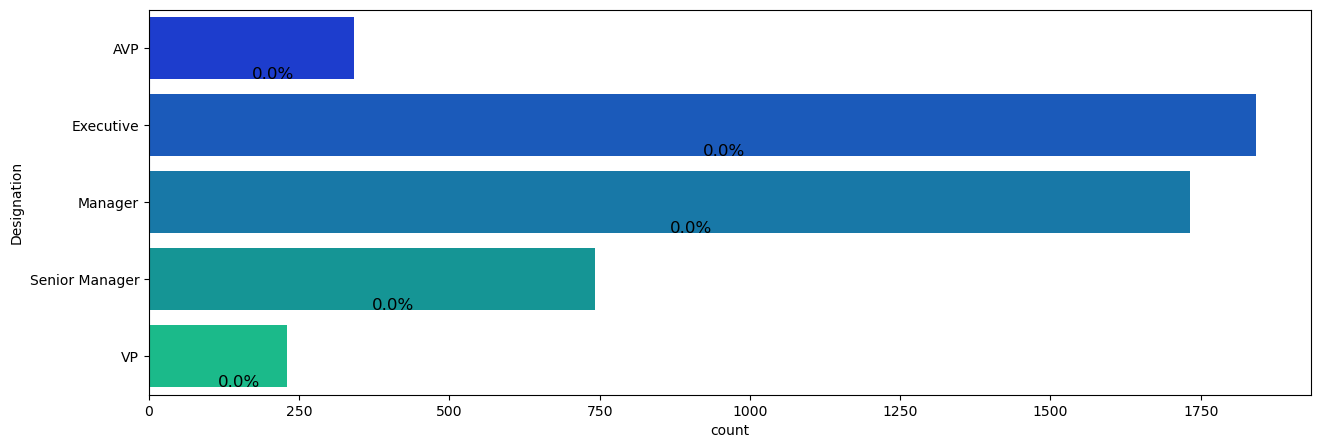

In [84]:
plt.figure(figsize=(15,5))
ax = sns.countplot(customer_data["Designation"],palette='winter')
perc_on_bar(ax,customer_data["Designation"])

In [85]:
customer_data.groupby(['Designation'])[['Designation']].count()

,Designation
Designation,
AVP,342
Executive,1842
Manager,1732
Senior Manager,742
VP,230


In [86]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23559.179419,5257.862921,1000.0,20485.0,22347.0,25424.75,98678.0


### Additional Univariate Analysis Observations and Insights

1.	Of the 4,888 customers, only 920 (18.8%) previously purchased a travel package. 
2.	About 70% of the customers self-inquired about a travel package in the past. 
3.	Nearly two-thirds (65%) of customers are in a “Tier 1” city (development, population, facilities, and living standards). Nearly one-third (31%) are in a “Tier 3” city, and the rest (< 5%) are in a “Tier 2” city. 
4.	About 90% of customers are salaried (near half), with about 40% working for a small business. Nearly 10% work for a large business, and two customers are free lancers.
5.	Approximately half the customers anticipate traveling with three other people. About 30% anticipate traveling with two, 20% with one. Less than 1% anticipate traveling with only one person or five others. 
6.	Nearly 75% of all customers received either three or four follow-ups by sales staff after the initial pitch. Less than 10% received fewer than three and nearly 20% received five or more follow-ups (none more than six). 
7.	Of the five packages offered in the past, the Basic package was pitched most often (38%), followed by Deluxe (35%), Standard (15%), Super Deluxe (7%), and King (5%).
8.	The majority of customers (62%) prefer a 3-star rated hotel whereas nearly 40% seek a higher quality (19% 4-star, 19% 5-star). 
9.	In terms marital status, 48% are married, 19% are divorced, 19% single, and 14% unmarried. 
10.	Surprisingly, 71% of customers do not have a passport for international travel. 
11.	The sales pitch satisfaction scores have room for improvement. Nearly one-third rated 2 or worse (scale of 1 = worse, to 5 = best). The percentage of “3” (average) ratings was 30% and 19% rated “4”, 20% rated “5”.  
12.	Approximately half the customers (44%) anticipate traveling with one child under the age of five years old. About 30% anticipate traveling with two, 22% with one. About 7% anticipate traveling with three children under the age of five years old. 
13.	The majority of customers are senior within their work organization. About 38% identify as an Executive, followed by 35% as Manager, 15% as Senior Manager, 7% as AVP, and 5% as VP. 


## <a id = "link3"> Exploratory Data Analysis (EDA): Multivariate Analysis</a>

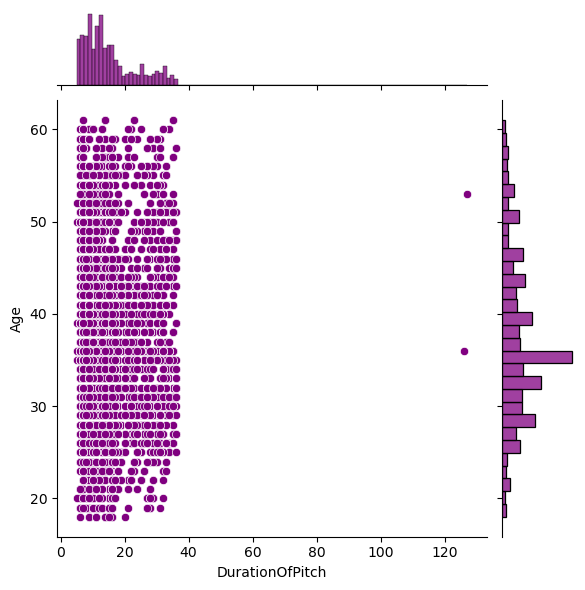

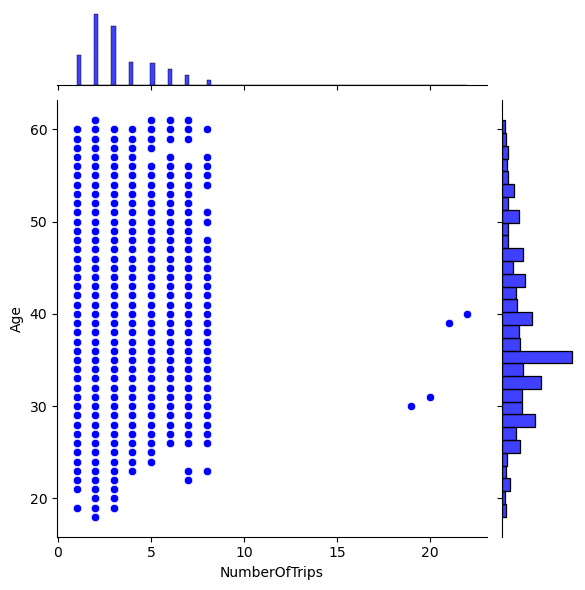

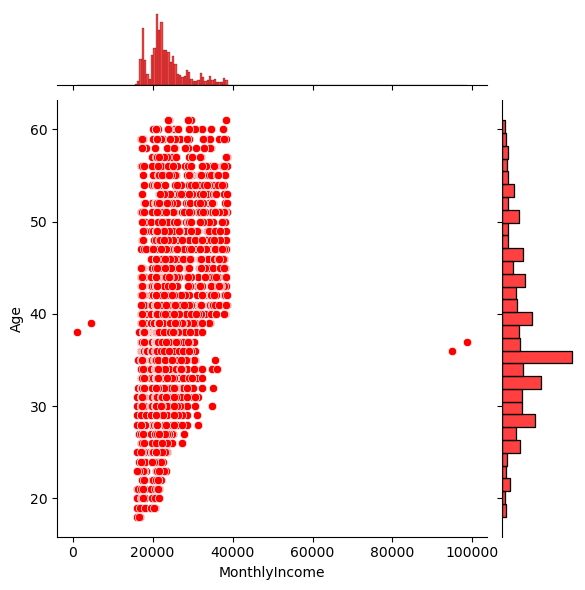

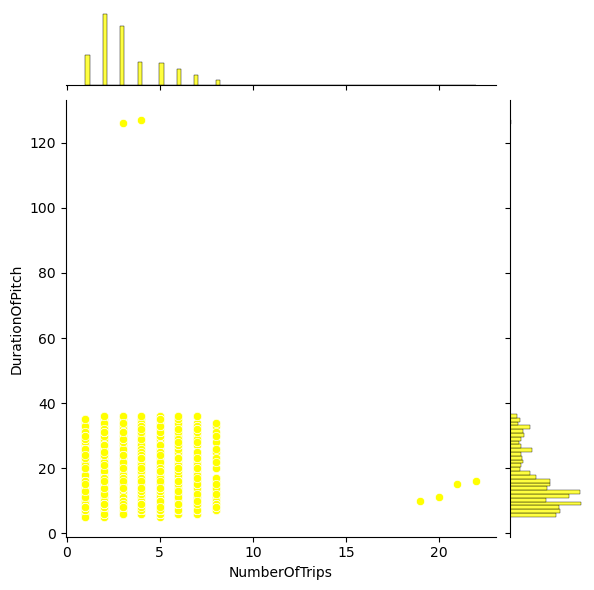

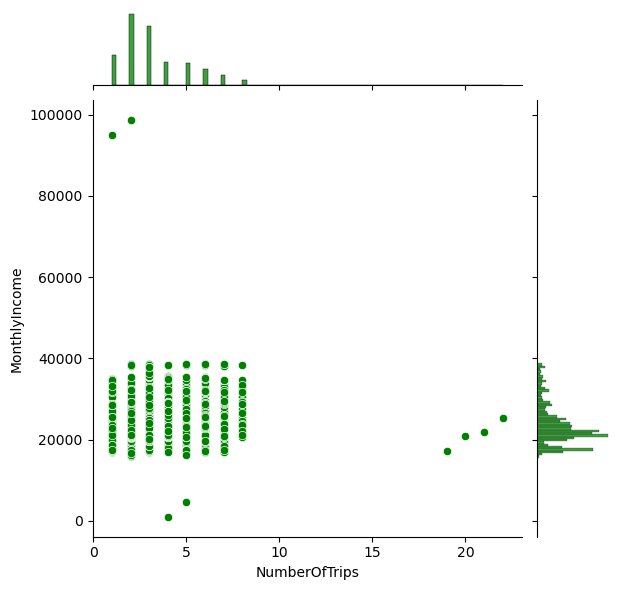

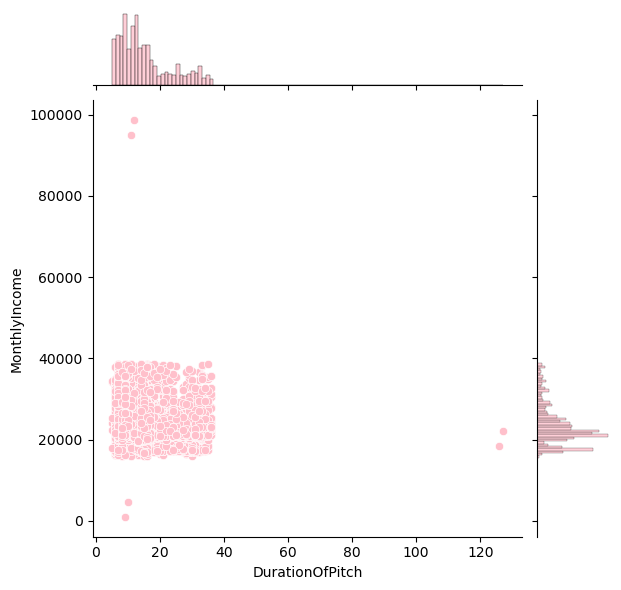

In [90]:
# bivariate joint plots with the relationship of numerical variables

sns.jointplot(y =customer_data['Age'], x = customer_data['DurationOfPitch'],color='purple')
plt.show()

sns.jointplot(y=customer_data['Age'], x=customer_data['NumberOfTrips'],color='blue')
plt.show()

sns.jointplot(y=customer_data['Age'], x=customer_data['MonthlyIncome'],color='red')
plt.show()

sns.jointplot(y=customer_data['DurationOfPitch'], x=customer_data['NumberOfTrips'],color='yellow')
plt.show()

sns.jointplot(y=customer_data['MonthlyIncome'], x = customer_data['NumberOfTrips'],color='green')
plt.show()

sns.jointplot(y =customer_data['MonthlyIncome'], x =customer_data['DurationOfPitch'],color='pink')
plt.show()

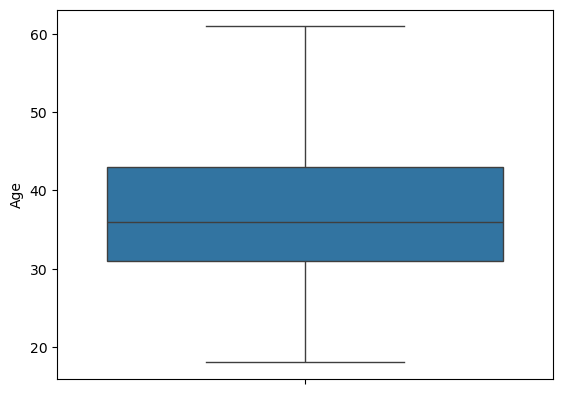

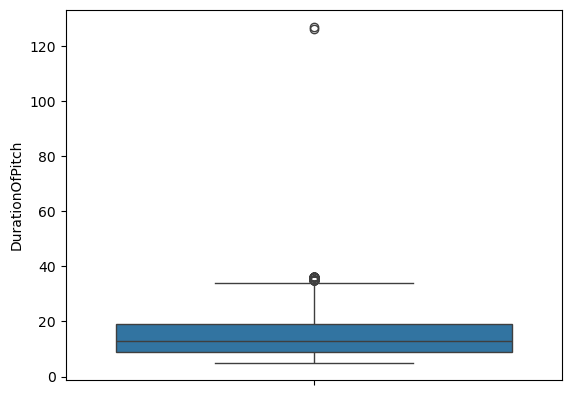

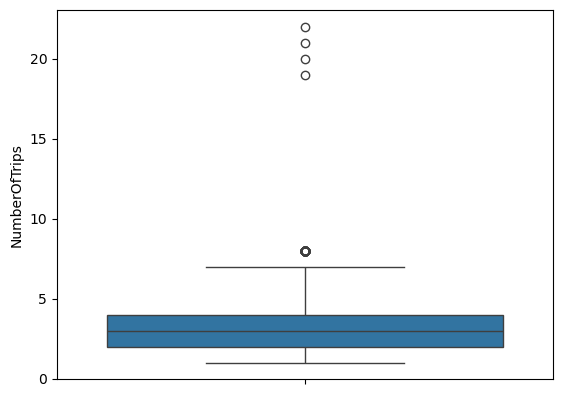

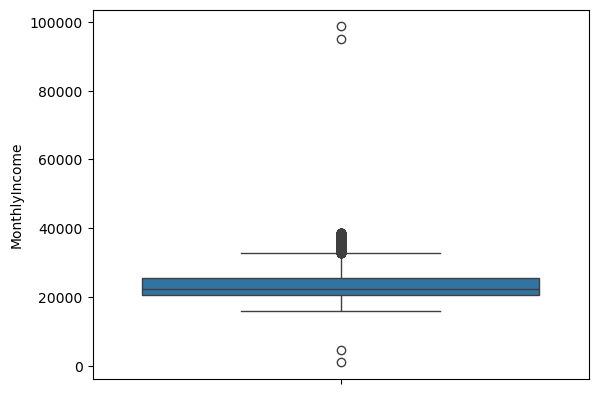

In [91]:
# box plots to show the relationship between two variables 
# Five Number Summary: Min, 25%, 50%, 75%, Max (box plot is a visual representation of the 5 number summary)
# The "whiskers" extend to points that are within 1.5 IQRs of the lower and upper quartile.
# The values (outliers) outside this range are displayed independently. 

# IQR = Q3 (75%) - Q1 (25%)

sns.boxplot(customer_data['Age'])
plt.show()

sns.boxplot(customer_data['DurationOfPitch'])
plt.show()

sns.boxplot(customer_data['NumberOfTrips'])
plt.show()

sns.boxplot(customer_data['MonthlyIncome'])
plt.show()


In [ ]:
customer_data.corr()

#### Correlation Analysis
1.	There is a nearly non-existent correlation between the customer’s age and the duration of the sales pitch they received.
2.	Intuitively, there is a reasonably high positive correlation with age and monthly income. 
3.	There is also a positive correlation between a customer’s age and the average number of trips they take each year. 
4.	The number of trips that customers take has a slight positive correlation with their monthly income. 
5.	The duration of the initial sales pitch also has little bearing on how often a customer will travel in a year. 


In [ ]:
cols = customer_data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(customer_data["ProdTaken"],customer_data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [ ]:
stacked_plot(customer_data['TypeofContact'])

In [ ]:
print(310/917)
print(607/917)
print(310/1419)
print(607/3444)

In [ ]:
stacked_plot(customer_data['CityTier'])

In [ ]:
print(520/920)
print(46/920)
print(354/920)
print("")
print(520/3190)
print(46/198)
print(354/1500)

In [ ]:
stacked_plot(customer_data['Occupation'])

In [ ]:
print(2/2)
print(120/434)
print(414/2368)
print(384/2084)

In [ ]:
stacked_plot(customer_data['Gender'])

In [ ]:
print(342/1972)
print(578/2916)

In [ ]:
stacked_plot(customer_data['NumberOfPersonVisiting'])

In [ ]:
print(0/39)
print(267/1418)
print(460/2402)
print(193/1026)
print(0/3)

In [ ]:
stacked_plot(customer_data['NumberOfFollowups'])

In [ ]:
print(20/176)
print(24/229)
print(244/1466)
print(387/2113)
print(191/768)
print(54/136)

In [ ]:
stacked_plot(customer_data['ProductPitched'])

In [ ]:
print(552/1842)
print(204/1732)
print(20/230)
print(142/742)
print(20/342)

In [ ]:
stacked_plot(customer_data['PreferredPropertyStar'])

In [ ]:
print(488/3019)
print(182/913)
print(250/956)

In [ ]:
stacked_plot(customer_data['MaritalStatus'])

In [ ]:
print(124/950)
print(326/2340)
print(304/916)
print(166/682)

In [ ]:
stacked_plot(customer_data['Passport'])

In [ ]:
print(426/3466)
print(494/1422)

In [ ]:
stacked_plot(customer_data['PitchSatisfactionScore'])

In [ ]:
print(144/942)
print(88/586)
print(316/1478)
print(162/912)
print(210/970)

In [ ]:
stacked_plot(customer_data['OwnCar'])

In [ ]:
print(360/1856)
print(560/3032)

In [ ]:
stacked_plot(customer_data['NumberOfChildrenVisiting'])

In [ ]:
print(202/1082)
print(399/2146)
print(253/1335)
print(66/325)

In [ ]:
stacked_plot(customer_data['Designation'])

In [ ]:
print(20/342)
print(552/1842)
print(204/1732)
print(124/742)
print(20/230)

### Multivariate Analysis Observations and Insights

#### Analysis of Customers who Did and Did Not Purchase a Travel Package from Us in the Past

1.	In the past, 920 customers purchased a travel package from us – 67% of them inquired on their own and 33% were contacted by one of our sales representatives. 
2.	The success rate on “company invited” type of contact was 22%, compared to 18% when customers inquired on their own. 
3.	The percentage of customers from a Tier 1 city who purchased a travel package was 16%, compared to 23% from Tier 2, and 24% from Tier 3. 
4.	28% of customers employed by a large business purchased a travel package, compared to 18% from a small business. 17% of salaried employees purchased a travel package and both customers free lance purchased a travel package.
5.	Male customers purchased a travel package at a slightly higher rate (20%) than female (17%). 
6.	Customers with one or five other people traveling with them did not by a travel package in the past. However, that accounts for less than 1% of total customers. When traveling with 2-4 other people, the rate at which customers purchased a travel package was consistent – around 19%.
7.	There is a positive correlation between how often a sales rep follows-up with a customer and them purchasing a travel package. With six follow-ups, the purchase rate was 40%, 25% with five, 18% with four, 17% with three, and around 10% when we followed-up only once or twice. 
8.	When we pitched our Basic package (which was most of the time), our success rate was high – at 30%, compared to 19% for the Standard package, 11% for Deluxe, and only 8% for 6% for King and Super Deluxe, respectively.
9.	Customers who prefer to stay at higher-end hotels also are more likely to purchase a travel package from us. The success rate is 26% for customers who prefer a 5-star hotel, 20% for those who prefer a 4-star hotel, and 16% for those who prefer a 3-star hotel. 
10.	Single travelers purchased a travel package from us at the highest rate (33%), followed by unmarried (24%). Both divorced and married travelers appear much less likely – at about 13% each.   
11.	Unsurprisingly, customers with a passport are nearly three times as likely to purchase a travel package. The past success rate is 35% for those who have a passport, and 12% for those who do not. 
12.	Higher customer satisfaction scores (re: sales pitch) tend to result in a greater likelihood to purchase a travel package. Those who rated “5” (best), purchased 22% of the time. The success rate for those who rated “4” is 18%, “3” is 21%, and noticeably lower when ratings are two or worse (15%). 
13.	There is little difference in customers who purchase a travel package between those who own a car and those who do not. Both are around 19%. 
14.	Customers who plan to travel with three young children (under the age of five) are slightly more likely to have purchased a travel package from us (20%), compared to those with fewer than three (19%). 
15.	Executives purchased a travel package from us at a much higher rate (30%) than others. Senior Managers and Managers were at 17% and 12%, respectively. Both VP and AVP were under 10% (9% and 6%, respectively). 
16.	Although older customers tend to have higher incomes and work titles, the average age of customers who purchased a travel product was slightly lower than those who did not. 
17.	The duration of the sales pitch was longer when customers ultimately purchased a product – despite one very long pitch that did not result in a sale. 
18.	There is not a material difference in monthly income between those who purchased a travel package and those who did not – largely because the incomes are relatively high for most customers. Those at the lowest end of monthly income did not purchase a travel package. 
19.	The annual frequency at which customers travel appears to little variation amongst those who purchased from us and those who did not. 


## <a id = "link4"> Data Pre-Processing (for Modeling) </a>

In [ ]:
#creating a function to convert the categorical data. ONLY FOR ProductPitched and Designation - so we can rank order them. 
# others will use one hot encoding   

replaceStruct = {
                "ProductPitched":     {"Basic": 1, "Standard": 2 ,"Deluxe": 3 ,"Super Deluxe":4, "King":5},
                "Designation": {"AVP": 1, "VP":2 , "Manager": 3, "Senior Manager": 4,"Executive": 5}}
            
#We will use One Hot Encoder convert categorical values into numerical values.
#Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.
oneHotCols=["TypeofContact","CityTier","Occupation","NumberOfPersonVisiting","NumberOfFollowups","ProductPitched","PreferredPropertyStar","MaritalStatus","PitchSatisfactionScore","NumberOfChildrenVisiting","Designation"]

In [ ]:
customer_data=customer_data.replace(replaceStruct) # replace the original dataframe with the reclassified one

customer_data=pd.get_dummies(customer_data, columns=oneHotCols) 
#restate the dataframe again by adding dummy variables (One Hot Encoder)



In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
customer_data.head(10)

In [ ]:
customer_data.info() # our dataframe went from 20 columns and 1,000 rows to 54 columns and 1,000 rows

### Split the Data into Training and Testing Datasets

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [ ]:
X = customer_data.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = customer_data['ProdTaken']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

#stratify=y to maintain the ratio of defaulters and non-defaulters across the datasets.

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
#Let's check that splitting the data worked. 

print("{0:0.2f}% data is in training set".format((len(X_train)/len(customer_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(customer_data.index)) * 100))

#### The "Stratify" arguments maintains the original distribution of classes in the target variable ("Prod_Taken") while splitting the data into train and test sets.

In [ ]:
y.value_counts(1)

In [ ]:
y_test.value_counts(1)

#### Before building the model, we will create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Ensemble Methods Overview

Ensembles are machine learning methods for combining predictions from multiple separate models.

The central motivation is rooted under the belief that a committee of experts working together can perform better than a single expert. Each model (“expert”) should have some independence from others – diversification. The final combined prediction could be more accurate and have less variance. It’s OK to have some of the models being simple (aka “weak learners”), like a single decision tree. It can make computational time faster, compared to multiple complex models.

Bagging and boosting are two types of ensemble learning techniques. These two decrease the variance of single estimate as they combine several estimates from different models. So the result may be a model with higher stability.


#### Confusion Matrix/Model Summary

True Positives (TP): The model predicted they would buy, and they did.

True Negatives (TN): The model predicted they would not buy, and they didn't.

False Positives (FP): The model predicted they would buy, but they did not (a "Type I error"). 

False Negatives (FN): The model predicted they would not buy, but the did (a "Type II error").

Recall is TP/(TP+FN) - True Positives as a percentage of True Positives + False Negatves

Accuracy is (TP+TN)/(TP+TN+FP+FN) - Accurate Predictions as a percentage of Total Predictions

Precision is TP/(TP+FP) - True Positives as a percentage of All Positives

Classification Error rate is (FP+FN)/(TP+TN+FP+FN) - Inaccurate Predictions as a percentage of Total Predictions

### Model evaluation criterion

#### A model can make two types of wrong predictions:
1. Predicting a customer will purchase our travel package, but they don't 
2. Predicting a customer will not purchase our travel package, yet they do

#### Which case is more important? 
* Predicting that customer will purchase our travel package, but they don't. That is, we spend time and money marketing to a certain segment of customers with the anticipation that they are likely to buy a travel package from us - but they do not. 
* However, we also want to minimize the instances where we are wrong - even if they do purchase a travel package. 

Therefore, we will focus on maximizing Accuracy and Recall. 

We expect a very high Accuracy, Recall, and Precision on the training set. However, if it is much lower on the test set, the model is overfitted to the training set.

## <a id = "link5"> Modeling: Bagging </a> 

#### Bagging Overiew

Bagging takes a bunch of samples from one sample to make a bunch of weak learners into a strong learner. 

Bagging is used to reduce variance of the model and it tends to assign an equal weight to each model in the final prediction.

- We have built 3 sets of bagging models here - Decision Tree, Bagging Classifier, and Random Forest Classifier.
- First, we built models with default parameters and then use hyperparameter tuning to optimize the model performance.


### Model 1: Decision Tree Model ("dtree_inital")

In [ ]:
dtree_initial = DecisionTreeClassifier(random_state=1)

In [ ]:
dtree_initial.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(dtree_initial,y_test)

#### Decision Tree Classifier Model without Tuning ("dtree_initial"):
- This model predicted that 200 (13.6%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 78 (5.3%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,113 (75.9%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 76 (5.2%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
dtree_initial_acc = get_accuracy_score(dtree_initial)
dtree_initial_recall = get_recall_score(dtree_initial)
dtree_initial_precision = get_precision_score(dtree_initial)

### Model 2: Decision Tree Classifier Model with Class Weights Hyperparameter ("dtree")

* If the frequency of class A is 19% and the frequency of class B is 81%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(dtree,y_test)

#### Decision Tree Classifier Model ("dtree") with Class Weights Hyperparameter:
- This model predicted that 187 (12.8%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 92 (6.3%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,099 (74.9%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 89 (6.1%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

### Model 3: Bagging Classifier Model

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(bagging,y_test)

#### Bagging Classifier Model ("bagging"):
- This model predicted that 168 (11.5%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 21 (1.4%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,170 (79.8%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 108 (7.4%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

### Model 4: Bagging Classifier with a Weighted Decision Tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(bagging_wt,y_test)

#### Weighted Bagging Classifier Model ("bagging_wt"):
- This model predicted that 142 (9.7%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 22 (1.5%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,169 (79.7%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 134 (9.1%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
bagging_wt_acc = get_accuracy_score(bagging_wt)
bagging_wt_recall = get_recall_score(bagging_wt)
bagging_wt_precision = get_precision_score(bagging_wt)

### Model 5: Logistic Regression as the Base Estimator for the Bagging Classifier "bagging_lr" 
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [ ]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(bagging_lr,y_test)

#### Bagging Classifier Model with Logistic Regression as the Base Estimator ("bagging_lr"):
- This model predicted that 46 (3.1%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 13 (0.9%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,178 (80.3%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 230 (15.7%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
bagging_lr_acc = get_accuracy_score(bagging_lr)
bagging_lr_recall = get_recall_score(bagging_lr)
bagging_lr_precision = get_precision_score(bagging_lr)

### Model 6: Random Forest Model ("rf")

In [ ]:
#Train the random forest classifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(rf,y_test)

#### Random Forest Model ("rf"):
- This model predicted that 150 (10.2%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 13 (0.9%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,178 (80.3%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 126 (8.6%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

### Model 7: Random Forest with Class Weights ("rf_wt")

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(rf_wt,y_test)

#### Weighted Random Forest Model ("ref_wt"):
- This model predicted that 134 (9.1%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 11 (0.8%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,180 (80.4%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 142 (9.7%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
rf_wt_acc = get_accuracy_score(rf_wt)
rf_wt_recall = get_recall_score(rf_wt)
rf_wt_precision = get_precision_score(rf_wt)

### Hyperparameter Tuning

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we resort to experimentation (i.e., we uses "GridSearch")
* "GridSearch" is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Some of the important hyperparameters available for the Bagging Classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees (models) in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees (sampling with replacement). If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data. If 700 rows are in our training dataset, each boostrapped sample will also include 700 rows by using sampling with replacement. 
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False. 

### Model 8: Tuned Decision Tree Model ("dtree_estimator")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from 
# these are usually the best parameters for this type of model, with most inclusion that is not too computentionally intensive)
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(dtree_estimator,y_test)

#### Tuned Decision Tree Classifier Model ("dtree_estimator"):
- This model predicted that 0 (0.0%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 0 (0.0%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,191 (81.2%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 276 (18.8) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
dtree_estimator_acc = get_accuracy_score(dtree_estimator)
dtree_estimator_recall = get_recall_score(dtree_estimator)
dtree_estimator_precision = get_precision_score(dtree_estimator)

### Model 9: Tuned Bagging Classifier Model ("bagging_estimator")

In [ ]:
# grid search for bagging classifier
bagging_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[bagging_estimator],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)

In [ ]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

#### Tuned Bagging Classifier Model ("bagging_estimator"):
- This model predicted that 162 (11.0%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 10 (0.7%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 114 (7.8%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 1,181 (80.5%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

### Model 10: Tuned Random Forest Model

#### Hyperparameter Tuning

**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

The Hyperparameters available in Random Forest Classifiers are almost identical to that of Bagging Classifiers. 

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [ ]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

#### Tuned Random Forest Model ("rf_estimator"):
- This model predicted that 188 (12.6%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 18 (1.2%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,173 (80.0%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 88 (6.0%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

### Model 11: Tuned Random Forest Model with Class Weights 

In [ ]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "class_weight": [{0: 0.19, 1: 0.81}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

#### Tuned Random Forest Model with Class Weights ("rf_estimator_weighted"):
- This model predicted that 177 (12.1%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 77 (5.3%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,114 (75.9%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 99 (6.8%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
rf_estimator_weighted_acc = get_accuracy_score(rf_estimator_weighted)
rf_estimator_weighted_recall = get_recall_score(rf_estimator_weighted)
rf_estimator_weighted_precision = get_precision_score(rf_estimator_weighted)

### Modeling Insights and Observations: Bagging

#### Comparing all thge Bagging Models

In [ ]:
# defining list of models (we created 8 in total)
models = [dtree_initial,dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,bagging_lr,rf,rf_wt,rf_estimator,rf_estimator_weighted]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# create a data frame to compare the models 
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree with Class Weights','Decision Tree with Class Weights, tuned','Bagging Classifier','Bagging Classifier with Decision Tree, wtd',
                                          'Bagging Classifier with Decision Tree, tuned','Bagging Classifier with Logisitic Regression','Random Forest','Random Forest with Class Weights','Tuned Random Forest','Random Forest with Class Weights, tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

### Feature Importance of the Best Bagging Models:

#### Decision Tree Model ("dtree_initial"):

In [ ]:
print (pd.DataFrame(dtree_initial.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = dtree_initial.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Decision Tree Model ("dtree_initial") Summary: 
    
The Decision Tree (“dtree_initial”) model has a large number of features (~50), but only a few contribute more than 5% weighting/importance. They include:
•	Customer Age (16%)
•	Duration of the Sales Pitch, in minutes (14%)
•	Monthly Income (10%)
•	Customers who are an Executive in their work organization (7%)
•	The average number of trips the customer takes each year (6%)
•	If the customer is a passport holder, for international travel (6%).

These six factors contribute about 60% of the feature importance. In other words, based upon the initial Decision Tree model, older customers who are executives with higher income that tend to travel often and have a passport are more likely to purchase our travel package. The longer the duration of the sales pitch to them (within reason, of course), the greater the chance of a sale. 


#### Tuned Random Forest Model ("rf_estimator")

In [ ]:
print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Tuned Random Forest Model ("rf_estimator") Summary: 

The Tuned Random Forest Model (“rf_estimator”) model has a large number of features (~50), but only five contribute more than 5% weighting/importance. They include:
•	Monthly Income (12%)
•	Customer Age (12%)
•	Duration of the Sales Pitch, in minutes (11%)
•	If the customer is a passport holder, for international travel (7%)
•	The average number of trips the customer takes each year (6%).

Other important factors, albeit to a lesser extent include: 
•	If the product pitched was “Basic”, opposed to a higher-level package
•	Customers who are an Executive in their work organization
•	If the customer is Single.

The top five factors contribute about 50% of the feature importance. In other words, similar to the initial Decision Tree model, older (single) customers who are executives with higher income that tend to travel often and have a passport are more likely to purchase our travel package. The longer the duration of the sales pitch to them (within reason, of course), the greater the chance of a sale. They also tend to prefer packages with fewer frills and expense. 


## <a id = "link6"> Modeling: Boosting </a>

#### Boosting Overview

Boosting refers to the general problem of producing a very accurate prediction rule by combining rough and moderately inaccurate rules-of-thumb. The idea of boosting came out of the idea of whether a weak learner can be modified to become better. A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
The statistical framework cast boosting as a numerical optimization problem where the objective is to minimize the loss of the model by adding weak learners using a gradient descent like procedure.

- We are going to build 3 sets of ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, we will build these models with default parameters and then use hyperparameter tuning to optimize the model performance.

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Model 1: Adaptive (Ada)Boost Model ("abc")

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(abc,y_test)

#### AdaBoost Model ("abc"):
- This model predicted that 87 (5.9%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 40 (2.7%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,151 (78.5%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 189 (12.9%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

### Model 2: Gradient Boost Model ("gbc")

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(gbc,y_test)

#### Gradient Boost Model ("gbc"):
- This model predicted that 100 (6.8%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 25 (1.7%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,166 (79.5%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 176 (12.0%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

### Model 3: Extreme Gradient Boosting (XG Boost) Model ("xgb")

In [ ]:
xgb = XGBClassifier(random_state=1,
                   eval_metric='logloss')
xgb.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(xgb,y_test)

#### XGBoost Model ("xgb"):
- This model predicted that 191 (13.0%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 25 (1.7%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,166 (79.5%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 85 (5.8%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

### Model 4: Tuned Adaptive (Ada)Boost Model ("abc_tuned")

#### Hyperparameter Tuning

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
Some important hyperparamters are:
base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

#### Tuned Adaptive (Ada)Boost Model ("abc_tuned"):
- This model predicted that 175 (11.9%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 66 (4.5%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,125 (76.7%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 101 (6.9%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

### Model 4: Tuned Gradient Boost Model ("gbc_tuned")

#### Hyperparameter Tuning

Most of the hyperparameters available are same as random forest classifier.
init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
There is no class_weights parameter in gradient boosting.

We first use AdaBoost classifier as the estimator for initial predictions

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

#### Tuned Gradient Boost Model ("gbc_tuned"):
- This model predicted that 126 (8.6%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 33 (2.3%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,158 (78.9%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 150 (10.2%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

### Model 5: Tuned Extreme Gradient Boosting (XG Boost) Model ("xgb_tuned")

**XGBoost has many hyper parameters which can be tuned to increase the model performance. Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,
                          eval_metric='logloss')


# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#### I HAD TO INTERRUPT THE PROGRAM (ABOVE) AND RESTATE THE PARAMETERS (BELOW) BECAUSE IT WOULD NOT PROCESS THE ABOVE AFTER HOURS OF RUNNING

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,
                          eval_metric='logloss')


# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [100],
    "scale_pos_weight":[0,1],
    "subsample":[0.8],
    "learning_rate":[0.1],
    "gamma":[0,1],
    "colsample_bytree":[0.8]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

#### Tuned Extreme Gradient (XG) Boost Model ("xgb_tuned"):
- This model predicted that 92 (6.3%) customers would purchase a travel package and they did (True Positive)
- This model predicted that 21 (1.4%) customers would purchase a travel package, but they did not (False Positive) - Type I Error
- This model predicted that 1,17 (79.8%) customers would not buy a travel package, and they did not (True Negative)
- This model predicted that 184 (12.5%) customers would not buy a travel package, but they did (False Negative) - Type II Error

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

#### Comparing All the Boosting Models

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

### Feature Importance of the Best Boosting Model:

#### Extreme Gradient Boosting (XG Boost) Model ("xgb"):

In [ ]:
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns

In [ ]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## <a id = "link7"> Final Insights and Recommendations </a> 

Throughout this notebook, I have performed extensive analysis on the data of nearly 5,000 "Visit with Us" customers. 

I explored individual variables (univariate analysis) to describe and find patterns in the data. Some of the interesting insights include: 

1.	About 70% of the customers self-inquired about a travel package in the past. 
2.	Nearly 75% of all customers received either three or four follow-ups by sales staff after the initial pitch. Less than 10% received fewer than three and nearly 20% received five or more follow-ups (none more than six). 
3.	Surprisingly, 71% of customers do not have a passport for international travel.
4.	Our sales pitch satisfaction scores have room for improvement. Nearly one-third rated 2 or worse (scale of 1 = worse, to 5 = best).  
5.	The majority of customers are senior within their work organization. About 38% identify as an Executive, followed by 35% as Manager, 15% as Senior Manager, 7% as AVP, and 5% as VP. 

I have also performed thorough multivariate analysis - looking at the relationships of two or more variables. Some of the insightful takeaways include:
1.	In the past, 920 customers (19% sales rate) purchased a travel package from us – 67% of them inquired on their own and 33% were contacted by one of our sales representatives. 
2.	The success rate on “company invited” type of contact was 22%, compared to 18% when customers inquired on their own. 
3.	28% of customers employed by a large business purchased a travel package, compared to 18% from a small business. 17% of salaried employees purchased a travel package and both customers free lance purchased a travel package.
4.	There is a positive correlation between how often a sales rep follows-up with a customer and them purchasing a travel package. With six follow-ups, the purchase rate was 40%, 25% with five, 18% with four, 17% with three, and around 10% when we followed-up only once or twice. 
5.	When we pitched our Basic package (which was most of the time), our success rate was high – at 30%, compared to 19% for the Standard package, 11% for Deluxe, and only 8% for 6% for King and Super Deluxe, respectively.
6.	Single travelers purchased a travel package from us at the highest rate (33%), followed by unmarried (24%). Both divorced and married travelers appear much less likely – at about 13% each.   
7.	Unsurprisingly, customers with a passport are nearly three times as likely to purchase a travel package. The past success rate is 35% for those who have a passport, and 12% for those who do not. 
8.	Higher customer satisfaction scores (re: sales pitch) tend to result in a greater likelihood to purchase a travel package. Those who rated “5” (best), purchased 22% of the time. The success rate for those who rated “4” is 18%, “3” is 21%, and noticeably lower when ratings are two or worse (15%). 
9.	Executives purchased a travel package from us at a much higher rate (30%) than others. Senior Managers and Managers were at 17% and 12%, respectively. Both VP and AVP were under 10% (9% and 6%, respectively). 
10.	The annual frequency at which customers travel appears to little variation amongst those who purchased from us and those who did not. 

#### As we unveil our new product, the "Wellness Tourism Package" we should be mindful of the analysis and findings summarized above.  

Doing so will help us overcome challenges of our prior campaign to make the marketing expenditure more efficient. 

That's why we've harnessed the data of existing and potential customers to help us expand our customer base by employing a more data-driven business model. 

During and following the exploratory data analysis, I performed a series of data processing activities to address issues that would be problematic in modeling. 

I then prepared the data into a format that could be used for applying two sets of ensemble models - "Bagging" and "Boosting." 

All told, I have built nearly twenty candidate models to see which ones would be most useful to help our Marketing department and senior management make informed decisions in our upcoming campaign. 